In [1]:
## load libraries
import spacy
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

#!python3 -m spacy download en_core_web_sm

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import os

# Path to your CSV and folder with text files
txt_folder = "/content/drive/Shareddrives/NDC_txts"
csv_path = "/content/drive/Shareddrives/NDC_txts/Reg_NDC_1.csv"

# Load your CSV
df = pd.read_csv(csv_path)

# Function to read text from file
def read_text(filename):
    file_path = os.path.join(txt_folder, filename)
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            return f.read()
    except FileNotFoundError:
        return None  # or return "" if you prefer an empty string

# Apply the function to the 'filename' column
df["text_content"] = df["filename"].apply(read_text)

In [4]:
df["text_content"]

,text_content
0,1 \n \n \n \n \n \n \nISLAMIC REPUBLIC OF AFGH...
1,\n1\nALBANIA REVISED NDC \nALBANIA REVISED ND...
2,1 \n \n \n \n \n \n \nThe People’s Democratic ...
3,Third contribution\ndetermined at the\nAndorra...
4,Nationally Determined Contribution (NDC) of An...
...,...
189,Vanuatu’s Revised and Enhanced\n1st Nationally...
190,Nationally Determined Contribution\nNationally...
191,SOCIALIST REPUBLIC OF VIET NAM\nNATIONALLY DET...
192,REPUBLIC OF ZAMBIA\n1.0 Background\nThis docum...


In [5]:
from tqdm import tqdm
import spacy

nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2000000

def normalize_word_count(df, target_word, normalization):
    normalized_counts = []
    target_word = target_word.lower()

    for text in tqdm(df["text_content"]):
        doc_nlp = nlp(text)

        # Count how many times the word appears
        word_count = sum(1 for token in doc_nlp if token.text.lower() == target_word)

        if normalization == "doc_length":
            total = len(text)

        elif normalization == "word_count":
            total = sum(1 for token in doc_nlp if not token.is_punct and not token.is_space)

        elif normalization == "nonstopword_count":
            total = sum(1 for token in doc_nlp if not token.is_punct and not token.is_space and not token.is_stop)

        else:
            raise ValueError(f"Unknown normalization option: {normalization}")

        normalized_value = word_count / total if total > 0 else 0
        normalized_counts.append(normalized_value)

    # Create the new column
    col_name = f"{target_word}_count_normalized"
    df[col_name] = normalized_counts

    print(f"Column '{col_name}' created successfully.")
    return df

In [6]:
df = normalize_word_count(df, target_word = 'regulation', normalization = 'nonstopword_count')
df.to_csv("/content/drive/Shareddrives/NDC_txts/Reg_NDC_1.csv", index=False)

100%|██████████| 194/194 [11:46<00:00,  3.64s/it]


Column 'regulation_count_normalized' created successfully.


In [7]:
df

,Code,Party,Income level,GDP USD Mar 2025,Human Development Index 2022,Region Name,Sub-region Name,Least Developed Countries (LDC),Small Island Developing States (SIDS),OECD,...,economic_growth_count_normalized,green_growth_count_normalized,clean_energy_count_normalized,energy_transition_count_normalized,development_count_normalized,private_count_normalized,technology_count_normalized,innovation_count_normalized,industry_count_normalized,regulation_count_normalized
0,AFG,Afghanistan,Low income,1.723305e+10,0.462,Asia,Southern Asia,1.0,0.0,0,...,0.000000,0.000000,0.000000,0.000000,0.012927,0.000834,0.005421,0.000000,0.002085,0.000000
1,ALB,Albania,Upper middle income,2.354718e+10,0.789,Europe,Southern Europe,0.0,0.0,0,...,0.000154,0.000000,0.000031,0.000000,0.004330,0.000215,0.000399,0.000184,0.001505,0.000061
2,DZA,Algeria,Upper middle income,2.476262e+11,0.745,Africa,Northern Africa,0.0,0.0,0,...,0.000000,0.000000,0.000000,0.000561,0.005045,0.000000,0.002803,0.000000,0.002242,0.000000
3,AND,Andorra,High income,3.785067e+09,0.884,Europe,Southern Europe,0.0,0.0,0,...,0.000000,0.000000,0.000000,0.000857,0.002678,0.001071,0.000000,0.000214,0.000107,0.000428
4,AGO,Angola,Lower middle income,8.482465e+10,0.591,Africa,Sub-Saharan Africa,1.0,0.0,0,...,0.000305,0.000000,0.000000,0.000000,0.006526,0.001037,0.000549,0.000122,0.002317,0.000061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,VUT,Vanuatu,Lower middle income,1.126313e+09,0.614,Oceania,Melanesia,0.0,1.0,0,...,0.000191,0.000128,0.000000,0.000000,0.004594,0.001723,0.000829,0.000064,0.000383,0.000000
190,VEN,Venezuela (Bolivarian Republic of),NaN,NaN,0.699,Americas,Latin America and the Caribbean,0.0,0.0,0,...,0.000021,0.000000,0.000000,0.000000,0.006941,0.000692,0.000923,0.000315,0.001027,0.000503
191,VNM,Viet Nam,Lower middle income,4.297170e+11,0.726,Asia,South-eastern Asia,0.0,0.0,0,...,0.000262,0.000175,0.000349,0.000524,0.008734,0.000873,0.002970,0.000000,0.001398,0.000087
192,ZMB,Zambia,Lower middle income,2.757796e+10,0.569,Africa,Sub-Saharan Africa,1.0,0.0,0,...,0.000663,0.000442,0.000000,0.000000,0.006189,0.001105,0.000442,0.000000,0.000442,0.000000


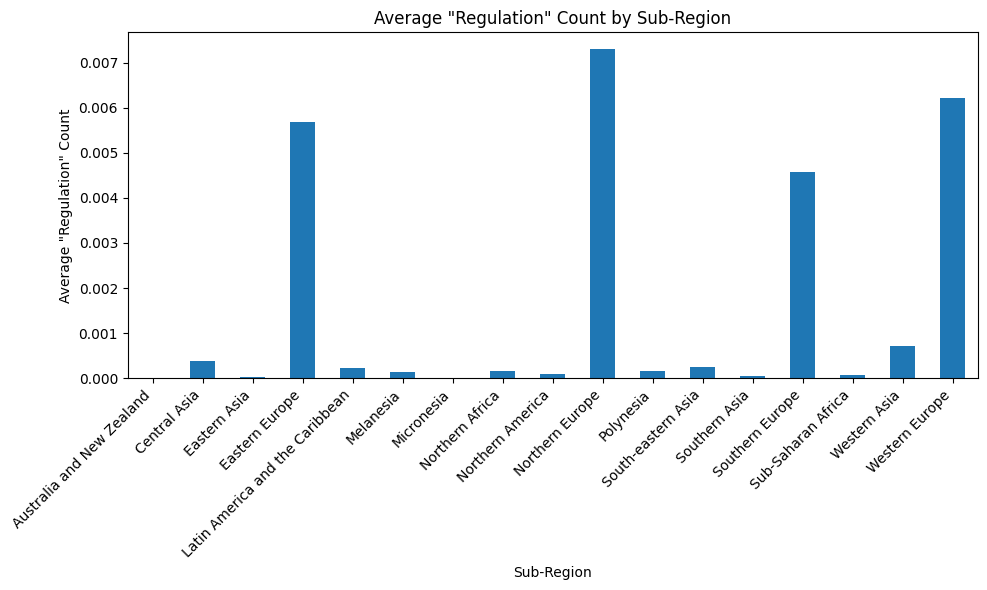

In [8]:
# prompt: plot the above dataframe by 'Party'

import matplotlib.pyplot as plt

# Group the DataFrame by 'Party' and calculate the mean growth count for each party
subregion_regulation_counts = df.groupby('Sub-region Name')['regulation_count_normalized'].mean()


# Create the plot
plt.figure(figsize=(10, 6))
subregion_regulation_counts.plot(kind='bar')
plt.title('Average Normalied "Regulation" Count by Sub-Region')
plt.xlabel('Sub-Region')
plt.ylabel('Average "Regulation" Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import plotly.express as px

# 3. Créer la carte choroplèthe
fig = px.choropleth(
    df,
    locations="Code",               # Nom de la colonne avec les codes ISO alpha-3
    color="regulation_count_normalized",                  # Variable à représenter par la couleur
    hover_name="Party",                 # Info affichée au survol de chaque pays
    color_continuous_scale="Viridis",     # Palette de couleurs ("Plasma", "Blues", "Turbo"...)
    title="Normalized Count of 'Regulation' by country", # Titre de la carte
    projection="natural earth"            # Style de projection cartographique
)

# 4. Afficher la carte interactive
fig.show()